In [1]:
import numpy as np
from hipposlam.utils import read_pickle
import pandas as pd
import matplotlib.pyplot as plt
from os.path import join
import os
import matplotlib as mpl
from matplotlib import cm
from tqdm import tqdm

In [2]:


project_tag = 'Avoidance'
data_dir = join('data', project_tag)
plot_dir = join('plots', project_tag, 'ratemaps')
os.makedirs(plot_dir, exist_ok=True)
trajdata = read_pickle(join(data_dir, 'traj.pickle'))
metadata = read_pickle(join(data_dir, 'meta.pickle'))
stored_f = metadata['stored_f']
f_pos = metadata['fpos']


trajdf = pd.DataFrame(trajdata)
trajdf['X_Nrow'] = trajdf['X'].apply(lambda x : x.shape[0])
trajdf['a'] = trajdf['rota'] * trajdf['rotz']
print('Max x row ', trajdf['X_Nrow'].max())
trajdf



Max x row  196


,t,x,y,z,rotx,roty,rotz,rota,objID,objID_dist,f_sigma,X,X_Nrow,a
0,128,4.680020,2.807367,0.061624,-1.579231e-03,-0.001579,-0.999998,1.570826,[],[],{},[],0,-1.570822
1,256,4.678977,2.754858,0.058151,-1.903525e-03,-0.001798,-0.999997,1.580309,"[2640, 5543, 15573, 15699, 17158]","[2640_2, 5543_1, 15573_2, 15699_1, 17158_1]","{'2640_2': [1], '5543_1': [1], '15573_2': [1],...","[[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0], [...",5,-1.580304
2,384,4.678577,2.701075,0.058773,-7.499675e-04,-0.000738,-0.999999,1.594632,"[2640, 5543, 15573, 15699, 17158]","[2640_2, 5543_1, 15573_2, 15699_1, 17158_1]","{'2640_2': [2], '5543_1': [2], '15573_2': [2],...","[[0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0], [...",5,-1.594631
3,512,4.678619,2.646312,0.059026,-3.263218e-04,-0.000293,-1.000000,1.613886,"[2640, 2717, 5543, 15573, 17158]","[2640_2, 2717_1, 5543_1, 15573_2, 17158_1]","{'2640_2': [3], '5543_1': [3], '15573_2': [3],...","[[0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0], [...",6,-1.613886
4,640,4.677918,2.591286,0.059130,-1.425992e-04,-0.000069,-1.000000,1.635931,"[1632, 1856, 2640, 2717, 5543, 15573, 17158]","[1632_2, 1856_2, 2640_2, 2717_1, 5543_1, 15573...","{'2640_2': [4], '5543_1': [4], '15573_2': [4],...","[[0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0], [...",8,-1.635931
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15338,1968384,4.108388,-0.634866,0.059201,-2.580587e-04,0.000066,-1.000000,-0.396684,"[1856, 5543, 14472, 15573, 15615, 15797]","[1856_1, 5543_1, 14472_1, 15573_1, 15615_1, 15...","{'2640_2': [], '5543_1': [], '15573_2': [], '1...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [...",196,0.396684
15339,1968512,4.156990,-0.614649,0.059201,-2.533233e-04,0.000073,-1.000000,-0.403152,"[1856, 5543, 14472, 15573, 15615, 15797]","[1856_1, 5543_1, 14472_1, 15573_1, 15615_1, 15...","{'2640_2': [], '5543_1': [], '15573_2': [], '1...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [...",196,0.403152
15340,1968640,4.205974,-0.593832,0.059201,-1.015182e-04,0.000090,-1.000000,-0.398917,"[1856, 5543, 14472, 15573, 15615, 15797]","[1856_1, 5543_1, 14472_1, 15573_1, 15615_1, 15...","{'2640_2': [], '5543_1': [], '15573_2': [], '1...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [...",196,0.398917
15341,1968768,4.256237,-0.573071,0.059201,5.461929e-07,0.000191,-1.000000,-0.393958,"[1856, 5543, 14472, 15573, 15615, 15797]","[1856_1, 5543_1, 14472_1, 15573_1, 15615_1, 15...","{'2640_2': [], '5543_1': [], '15573_2': [], '1...","[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [...",196,0.393958


In [3]:
from scipy.ndimage import gaussian_filter
from hipposlam.comput_utils import divide_ignore
def midedges(edges):
    return (edges[:-1] + edges[1:]) / 2


class BayesianDecoder:
    def __init__(self, xmin, xmax, ymin, ymax, dp, bodysd):
        self.xmin = xmin
        self.xmax = xmax
        self.ymin = ymin
        self.ymax = ymax
        self.dp = dp
        self.bodysd = bodysd
        self.bodysd_ind = self.bodysd/self.dp
        self.xedges = np.arange(xmin, xmax+dp, dp)
        self.yedges = np.arange(ymin, ymax+dp, dp)
        self.xedm = midedges(self.xedges)
        self.yedm = midedges(self.yedges)

    def compute_occupancy(self, x, y):

        H2d, _, _ = np.histogram2d(x, y, bins=(self.xedges, self.yedges))
        H2d_smooth = gaussian_filter(H2d, sigma=self.bodysd_ind, mode='constant', cval=0)
        return H2d, H2d_smooth

    def compute_spikecounts(self, xsp, ysp):
        H2d, _, _ = np.histogram2d(xsp, ysp, bins=(self.xedges, self.yedges))
        H2d_smooth = gaussian_filter(H2d, sigma=self.bodysd_ind, mode='constant', cval=0)
        return H2d, H2d_smooth

    def compute_ratemap(self, occ, spcounts):
        return divide_ignore(spcounts, occ)





In [4]:
# Compute occpancy
bodysd = 0.15  # body length of the robot = 0.3m
dp = 0.1
xmin = np.floor(trajdf['x'].min() * 10) / 10
xmax = np.ceil(trajdf['x'].max() * 10) / 10
ymin = np.floor(trajdf['y'].min() * 10) / 10
ymax = np.ceil(trajdf['y'].max() * 10) / 10
print(xmin, xmax, ymin, ymax)

BD = BayesianDecoder(xmin, xmax, ymin, ymax, dp, bodysd)


occ, occ_gau = BD.compute_occupancy(trajdf['x'].to_numpy(), trajdf['y'].to_numpy())
# fig, ax = plt.subplots(1, 2, figsize=(10, 4))
# im0 = ax[0].pcolormesh(BD.xedges, BD.yedges, occ.T)
# im1 = ax[1].pcolormesh(BD.xedges, BD.yedges, occ_gau.T)
# plt.colorbar(im0, ax=ax[0])
# plt.colorbar(im1, ax=ax[1])




-6.1 6.6 -2.5 4.7


In [5]:
Num_Fnodes = trajdf['X_Nrow'].max()

xdict = dict()
ydict = dict()
adict = dict()
fposdict = dict()
for i in range(trajdf.shape[0]):

    Xmat = trajdf['X'][i]
    x = trajdf['x'][i]
    y = trajdf['y'][i]
    a = trajdf['a'][i]
    f_sigma = trajdf['f_sigma'][i]

    for nodekey, sigma_list in f_sigma.items():
        for sigma in sigma_list:
            ensem_key = '%s-%d'%(nodekey, sigma)

            fposdict[ensem_key] = f_pos[nodekey.split('_')[0]]

            if ensem_key in xdict:
                xdict[ensem_key].append(x)
                ydict[ensem_key].append(y)
                adict[ensem_key].append(a)

            else:
                xdict[ensem_key] = [x]
                ydict[ensem_key] = [y]
                adict[ensem_key] = [a]



 19%|█▉        | 379/1960 [04:02<16:52,  1.56it/s] 


KeyboardInterrupt: 

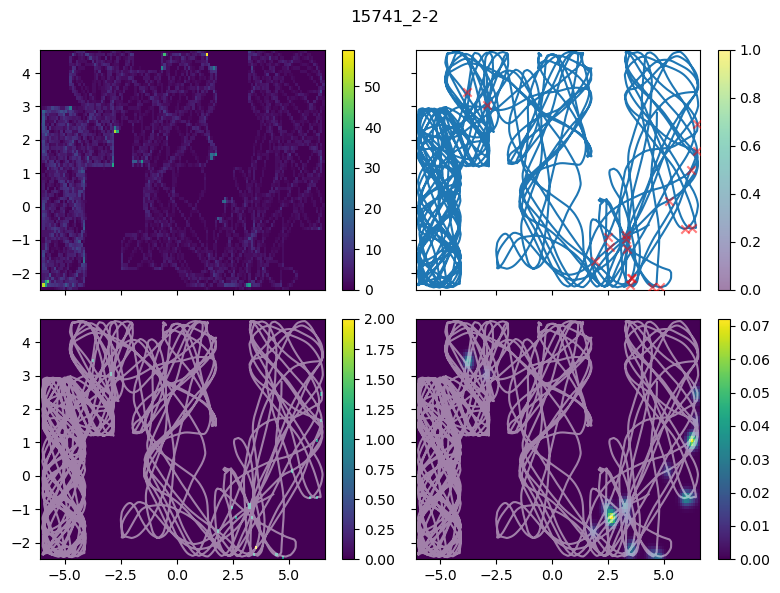

In [31]:
plot_ratemap = True
plot_dir2 = join('plots', project_tag, 'ratemaps2')
os.makedirs(plot_dir2, exist_ok=True)

num_ensem = len(xdict.keys())
id2ensemkey = [ensem_key for ensem_key in xdict.keys()]
ensemkey2id = dict()
for i, ensem_key in enumerate(id2ensemkey):
    ensemkey2id[ensem_key] = i

all_ratemaps = np.zeros((num_ensem, BD.xedm.shape[0], BD.yedm.shape[0]))

for i in tqdm(range(num_ensem)):
    ensem_key = id2ensemkey[i]
    xsp = xdict[ensem_key]
    ysp = ydict[ensem_key]

    spmap, spmap_gau = BD.compute_spikecounts(xsp, ysp)
    ratemap = BD.compute_ratemap(occ, spmap)

    ratemap = gaussian_filter(ratemap, sigma=BD.bodysd_ind, mode='constant', cval=0)

    all_ratemaps[i, :, :] = ratemap

    if plot_ratemap:
        fig, ax = plt.subplots(2, 2, figsize=(8, 6), sharex=True, sharey=True, facecolor='w')
        im0 = ax[0, 0].pcolormesh(BD.xedges, BD.yedges, occ.T)
        ax[0, 1].plot(trajdf['x'], trajdf['y'])
        im1 = ax[0, 1].scatter(xsp, ysp, color='r', marker='x', alpha=0.5, zorder=3)
        im2 = ax[1, 0].pcolormesh(BD.xedges, BD.yedges, spmap.T)
        ax[1, 0].plot(trajdf['x'], trajdf['y'], alpha=0.5, color='w')

        im3 = ax[1, 1].pcolormesh(BD.xedges, BD.yedges, ratemap.T)
        ax[1, 1].plot(trajdf['x'], trajdf['y'], alpha=0.5, color='w')
        plt.colorbar(im0, ax=ax[0, 0])
        plt.colorbar(im1, ax=ax[0, 1])
        plt.colorbar(im2, ax=ax[1, 0])
        plt.colorbar(im3, ax=ax[1, 1])
        fig.suptitle('%s'%(ensem_key))
        fig.tight_layout()
        fig.savefig(join(plot_dir, '%d.png'%(i)), dpi=200)
        plt.close(fig)





In [7]:
from scipy.special import factorial

def logPois(r, k, epsilon=1e-6):
    out = k * np.log(r+epsilon) - (r+epsilon) - factorial(k)
    return out

def PBern(p, k):
    return (p**k) * ((1-p) ** (1-k))

def logBern(p, k):
    out = k * np.log(p) + (1-k) * np.log(1-p)
    return out




In [13]:

xML = np.zeros(trajdf.shape[0])
yML = np.zeros(trajdf.shape[0])
np.random.seed(1)
subsampvec = np.random.permutation(num_ensem)

for i in tqdm(range(trajdf.shape[0])):
    f_sigma = trajdf['f_sigma'][i]
    idlist = []
    for nodekey, sigma_list in f_sigma.items():
        for sigma in sigma_list:
            ensem_key = '%s-%d'%(nodekey, sigma)
            ensem_id = ensemkey2id[ensem_key]
            idlist.append(ensem_id)

    act_vec = np.zeros(num_ensem)
    act_vec[idlist] = 1


    # all_ratemaps_epsilon = all_ratemaps + 1e-6
    # k_3d = act_vec.reshape(num_ensem, 1, 1)
    # logL_3d = k_3d * np.log(all_ratemaps_epsilon) - all_ratemaps_epsilon - factorial(k_3d)
    # logL = np.sum(logL_3d, axis=0)

    logL = np.zeros((BD.xedm.shape[0], BD.yedm.shape[0]))
    # for j in subsampvec[:200]:
    for j in range(num_ensem):
        ratemap = all_ratemaps[j]
        k = act_vec[j]
        ratemap_epsilon = ratemap + 1e-6
        out = k * np.log(ratemap_epsilon) - ratemap_epsilon - factorial(k)
        logL += out

    maxid1D_logL = np.argmax(logL)
    maxid2D_logL = np.unravel_index(maxid1D_logL, logL.shape)
    xML[i] = BD.xedm[maxid2D_logL[0]]
    yML[i] = BD.yedm[maxid2D_logL[1]]




100%|██████████| 15343/15343 [24:54<00:00, 10.27it/s]


0.13446254019992793


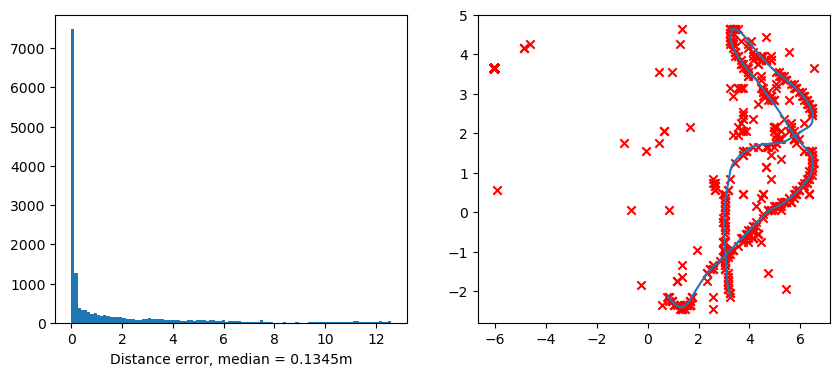

In [33]:
breakind=15342
xgt = trajdf['x'].to_numpy()[:breakind]
ygt = trajdf['y'].to_numpy()[:breakind]
xML = xML[:breakind]
yML = yML[:breakind]
mse = np.sqrt((xML - xgt)**2 + (yML - ygt)**2)
print(np.median(mse))
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
ax[0].hist(mse, bins=100)

breakind1 = 10000
ax[0].set_xlabel('Distance error, median = %0.4fm'  %np.median(mse))
ax[1].plot(xgt[breakind1:breakind1 + 500], ygt[breakind1:breakind1 + 500])
ax[1].scatter(xML[breakind1:breakind1 + 500], yML[breakind1:breakind1 + 500], color='r', marker='x')

In [57]:
type(all_ratemaps)

# Boundary Effect Investigation

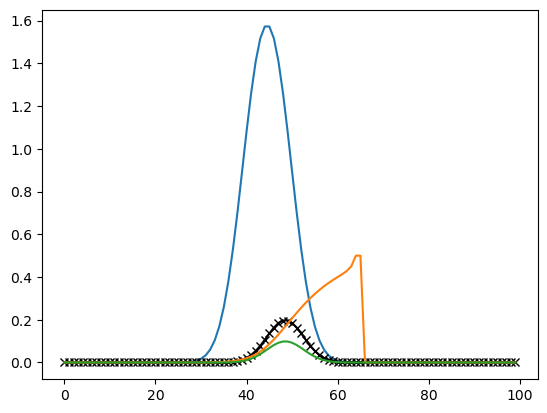

In [62]:
from scipy.ndimage import gaussian_filter1d


foox = np.zeros(100)
foox1 = foox.copy()
foox1[40:50] = 2
foox2 = foox.copy()
foox2[48:50] = 1
foox3 = divide_ignore(foox2, foox1)


foosd = 4

foo1 = gaussian_filter1d(foox1, sigma=foosd)
foo2 = gaussian_filter1d(foox2, sigma=foosd)
foo3 = divide_ignore(foo2, foo1)
plt.plot(foo1)
plt.plot(foo2, marker='x', color='k')
plt.plot(foo3)
plt.plot(gaussian_filter1d(foox3, sigma=foosd))


1.0


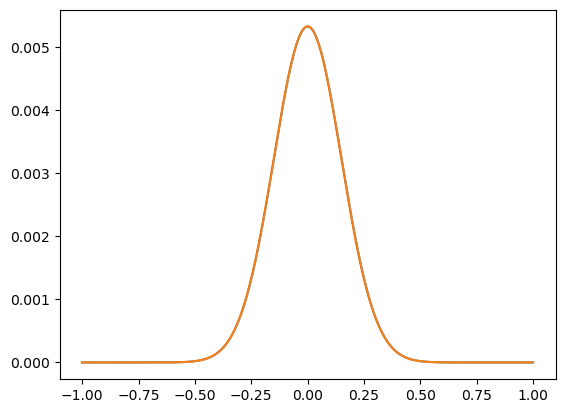

In [75]:

fiox = np.linspace(-1, 1, 1000)
fiodx = fiox[1]- fiox[0]

fiosd = 0.15
fioy = np.exp(np.square(fiox/fiosd) / -2) / (fiosd * np.sqrt(2*np.pi))
plt.plot(fiox, fioy * fiodx)


fiosd_ind = fiosd/fiodx
fiox_ind = np.zeros(fiox.shape[0])
fiox_ind[500] = 1
fioy_gau = gaussian_filter1d(fiox_ind, sigma=fiosd_ind)
plt.plot(fiox, fioy_gau)
print(fioy_gau.sum())


In [74]:
fiodx

0.002002002002001957